<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/An%C3%A1lise_dados_Gamepass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados Xbox Gamepass 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', 1000)

Importando a base de dados

In [2]:
gamepass = pd.read_csv('/content/mega_basededados_gp.csv')

In [6]:
gamepass.sample(10)

,Game,System,xCloud,Status,Added,Removed,Months,Release,Age,Metacritic,Completion,Genre (Giantbomb),Xbox Series X|S,Owner Notes,ESRB,ESRB Content Descriptors,Public Notes,GAME,RATIO,GAMERS,COMP %,AVERAGE TIME (h),RATING,True_Achievement,Game_Score,name,publisher,developer,platform,hardware,notes,medium,features,size (GB)
741,MISTOVER,PC,NaN,Removed,2020-04-01,2021-06-01,14.70,2019-10-01,0.50,84.0,33.5,"['Strategy', 'RPG']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NieR Automata: Become as Gods Edition,Xbox / PC,Touch Controls,Removed,2020-04-01,2022-03-01,23.41,2017-02-01,3.11,78.0,20.5,"['Action', 'RPG']",NaN,Joined PC 3/19/21,M,"['Blood', 'Partial Nudity', 'Strong Language',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,Operencia: The Stolen Sun,Xbox / PC,NaN,Removed,2019-03-01,2020-03-01,11.11,2019-03-01,0.00,83.0,19.0,['RPG'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operencia: The Stolen Sun,['Zen Studios'],['Zen Studios'],"['Xbox One', 'Xbox Series X|S', 'Windows (Wind...",64-Bit,['ID@Xbox'],['Digital'],"['Xbox One X Enhanced', 'Xbox Play Anywhere']",16.56
1039,Ms. Splosion Man,Xbox,NaN,Removed,2017-06-01,2019-05-01,22.98,2011-07-01,5.89,79.0,8.5,"['Action', 'Platformer']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,Split/Second,Xbox,NaN,Removed,2018-10-01,2019-09-01,11.01,2010-05-01,8.38,77.0,9.5,"['Action', 'Driving/Racing', 'Vehicular Combat']",NaN,NaN,NaN,NaN,Xbox 360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,Payday 2: Crimewave Edition,Xbox,NaN,Active,2017-06-01,NaN,63.09,2013-08-01,3.80,81.0,24.5,['FPS'],NaN,NaN,M,"['Blood and Gore', 'Suggestive Themes', 'Drug ...",NaN,Payday 2: Crimewave Edition,5.84,171.678,0.1,175.0,3.4,14662.0,2510.0,Payday 2: Crimewave Edition,['505 Games'],['OVERKILL Software'],"['Xbox One', 'Xbox Series X|S']",NaN,NaN,"['Digital', 'Physical']",NaN,22.37
620,The Surge 2,Xbox / PC,Yes,Removed,2020-03-01,2022-03-01,23.87,2019-09-01,0.48,83.0,21.5,"['Action', 'RPG']",NaN,NaN,M,"['Blood and Gore', 'Drug Reference', 'Strong L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Surge 2,"['Focus Entertainment', 'Maximum Games']",['Deck13 Interactive'],"['Xbox One', 'Xbox Series X|S']",NaN,"['xCloud', 'Xbox Game Pass']","['Digital', 'Physical']","['Xbox One X Enhanced', 'HDR']",7.66
655,The Dark Pictures Anthology: Man Of Medan,Xbox / PC,NaN,Removed,2020-08-01,2021-12-01,16.31,2019-08-01,0.94,85.0,4.0,['Adventure'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123,Final Fight: Double Impact,Xbox,NaN,Removed,2017-06-01,2018-05-01,10.98,2010-04-01,7.14,76.0,1.0,['Brawler'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,Halo 5: Guardians,Xbox,Yes,Active,2017-06-01,NaN,63.09,2015-10-01,1.60,53.0,8.0,['FPS'],NaN,NaN,T,"['Blood', 'Mild Language', 'Violence']",NaN,Halo 5: Guardians,2.47,383.062,2.5,45.0,4.1,3082.0,1250.0,Halo 5: Guardians,['Xbox Game Studios'],['343 Industries'],"['Xbox One', 'Xbox Series X|S']",NaN,"['xCloud', 'Xbox Game Pass']","['Digital', 'Physical']","['Xbox One X Enhanced', '4K', 'Cross-Play']",100.97


In [4]:
gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Game                      1150 non-null   object 
 1   System                    1150 non-null   object 
 2   xCloud                    555 non-null    object 
 3   Status                    1150 non-null   object 
 4   Added                     1150 non-null   object 
 5   Removed                   598 non-null    object 
 6   Months                    1150 non-null   float64
 7   Release                   1150 non-null   object 
 8   Age                       1150 non-null   float64
 9   Metacritic                1118 non-null   float64
 10  Completion                1104 non-null   float64
 11  Genre (Giantbomb)         1150 non-null   object 
 12  Xbox Series X|S           163 non-null    object 
 13  Owner Notes               89 non-null     object 
 14  ESRB    

Eliminando colunas indesejadas

In [9]:
# algumas colunas podem ser retiradas por questão de ambiguidade, é o caso das colunas 'GAME' e 'name', mas também as
# colunas 'Age' e 'Months'

gamepass.pop('GAME')
gamepass.pop('name')
gamepass.pop('Age')
gamepass.pop('Months')

0      -3.19
1      -3.35
2      -3.12
3      -2.93
4      -2.43
        ... 
1146    8.98
1147    8.02
1148    7.00
1149    2.47
1150     NaN
Name: Months, Length: 1151, dtype: float64

In [10]:
gamepass.head(2)

,Game,System,xCloud,Status,Added,Removed,Release,Metacritic,Completion,Genre (Giantbomb),Xbox Series X|S,Owner Notes,ESRB,ESRB Content Descriptors,Public Notes,RATIO,GAMERS,COMP %,AVERAGE TIME (h),RATING,True_Achievement,Game_Score,publisher,developer,platform,hardware,notes,medium,features,size (GB)
0,S.T.A.L.K.E.R. 2: Heart of Chornobyl,Xbox / PC,Yes,Coming Soon,2022-12-01,NaN,2022-12-01,NaN,NaN,"['FPS', 'Action-Adventure']",NaN,NaN,M,"['Intense Violence', 'Blood', 'Use Of Drugs An...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,High on Life,Xbox / PC,Yes,Coming Soon,2022-12-01,NaN,2022-12-01,NaN,NaN,['FPS'],NaN,NaN,M,"['Violence', 'Blood', 'Sexual Themes', 'Use of...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estatísticas descritivas

In [11]:
gamepass.describe()

,Metacritic,Completion,RATIO,GAMERS,COMP %,AVERAGE TIME (h),RATING,True_Achievement,Game_Score,size (GB)
count,1118.000000,1104.000000,339.000000,339.000000,339.000000,320.000000,339.000000,339.000000,339.000000,612.000000
mean,77.209302,17.894928,3.730265,83.529398,7.038938,53.982813,3.681416,4544.764012,1172.035398,13.344041
std,8.656740,35.063455,3.158158,95.560065,12.693068,100.498090,0.493847,4922.563390,623.332083,19.443943
min,35.000000,0.500000,1.040000,1.065000,0.000000,0.250000,2.300000,252.000000,200.000000,0.000000
25%,73.000000,5.500000,2.030000,19.928500,0.600000,9.000000,3.400000,2056.500000,1000.000000,1.230000
50%,78.000000,10.000000,2.920000,50.243000,2.000000,27.500000,3.700000,3188.000000,1000.000000,4.485000
75%,83.000000,19.000000,4.120000,113.637500,6.850000,70.000000,4.100000,4891.500000,1180.000000,16.842500
max,100.000000,608.000000,37.180000,738.000000,84.700000,1000.000000,4.700000,37178.000000,7000.000000,118.980000


Analisando a coluna Metacritic

In [12]:
# o Metacritic é um site agregador de notas da crítica especializada para filmes, séries, jogos etc.
# segundo a fonte: https://pt.wikipedia.org/wiki/Metacritic
# as obras apresentarão notas que, dependendo desta, receberão selo vermelho quando baixas, amarelo quando medianas e
# verdes quando boas

# a análise descritiva da coluna 'Metacritic' mostra que:

gamepass['Metacritic'].describe()


count    1118.000000
mean       77.209302
std         8.656740
min        35.000000
25%        73.000000
50%        78.000000
75%        83.000000
max       100.000000
Name: Metacritic, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


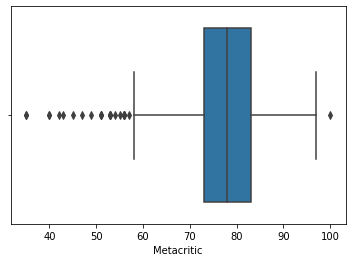

In [15]:
ax = sns.boxplot(gamepass['Metacritic'])

In [16]:
gamepass.query('Metacritic < 60')

,Game,System,xCloud,Status,Added,Removed,Release,Metacritic,Completion,Genre (Giantbomb),Xbox Series X|S,Owner Notes,ESRB,ESRB Content Descriptors,Public Notes,RATIO,GAMERS,COMP %,AVERAGE TIME (h),RATING,True_Achievement,Game_Score,publisher,developer,platform,hardware,notes,medium,features,size (GB)
22,Midnight Fight Express,Xbox / PC,Yes,Active,2022-08-01,NaN,2022-08-01,56.0,NaN,"['Action', 'Brawler']",NaN,NaN,M,"['Violence', 'Blood', 'Suggestive Themes', 'St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Xbox Game Pass'],"['Digital', 'Physical']",NaN,0.000
45,Overwhelm,PC,NaN,Active,2022-07-01,NaN,2018-07-01,40.0,6.0,"['Action', 'Platformer']",NaN,NaN,E10+,['Fantasy Violence'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Loot River,Xbox / PC,Touch Controls,Active,2022-05-01,NaN,2022-05-01,35.0,4.0,['Action'],NaN,NaN,T,"['Violence', 'Blood']",NaN,7.86,334.000,0.0,NaN,3.2,7859.0,1000.0,NaN,NaN,NaN,NaN,['Xbox Game Pass'],"['Digital', 'Physical']",NaN,0.000
120,Besiege (Game Preview),Xbox / PC,Touch Controls,Active,2022-02-01,NaN,2022-02-01,43.0,5.0,"['Strategy', 'Simulation']",NaN,NaN,T,"['Violence', 'Blood and Gore']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Before We Leave,Xbox / PC,Yes,Active,2021-12-01,NaN,2021-05-01,51.0,11.5,['Simulation'],NaN,NaN,E10+,['Fantasy Violence'],NaN,12.53,13.726,0.2,70.0,3.4,12528.0,1000.0,['Team17 Software'],['Balancing Monkey Games'],"['Xbox One', 'Xbox Series X|S', 'Windows (Wind...",64-Bit,"['ID@Xbox', 'xCloud', 'Xbox Game Pass', 'Xbox ...",['Digital'],"['Smart Delivery', 'Optimized for Series X|S',...",1.330
171,Evil Genius 2: World Domination,Xbox / PC,Yes,Active,2021-11-01,NaN,2021-03-01,47.0,28.5,"['Strategy', 'Simulation']",NaN,NaN,T,"['Fantasy Violence', 'Mild Language']",Satirical evil lair builder strategy game,8.20,31.909,0.1,135.0,3.6,8198.0,1000.0,['Rebellion'],['Rebellion'],"['Xbox One', 'Xbox Series X|S', 'Windows (Wind...","64-Bit, KBM Support","['ID@Xbox', 'xCloud', 'Xbox Game Pass', 'Xbox ...","['Digital', 'Physical']","['Xbox Play Anywhere', 'Smart Delivery', 'Opti...",15.020
352,Dead Space 3,Xbox / PC,NaN,Active,2020-11-01,NaN,2013-02-01,35.0,13.0,"['Action', 'Shooter']",FPS Boost,NaN,M,"['Blood and Gore', 'Strong Language', 'Intense...",Xbox 360,2.30,124.511,2.5,55.0,4.0,2875.0,1250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,Halo 2: Anniversary,PC,NaN,Active,2020-05-01,NaN,2004-11-01,56.0,8.0,['FPS'],NaN,NaN,M,"['Blood and Gore', 'Violence', 'Language']",OG Xbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,Totally Reliable Delivery Service,Xbox,Yes,Active,2020-04-01,NaN,2020-04-01,53.0,1.0,"['Action', 'Simulation']",FPS Boost,NaN,E10+,"['Crude Humor', 'Mild Fantasy Violence']",NaN,3.88,94.225,0.6,9.0,2.6,3991.0,1030.0,['tinyBuild'],"[""We're Five Games""]","['Xbox One', 'Xbox Series X|S']",NaN,"['ID@Xbox', 'xCloud', 'Xbox Game Pass']",['Digital'],NaN,3.280
460,The Bard's Tale Trilogy,Xbox / PC,Touch Controls,Active,2019-08-01,NaN,2018-08-01,59.0,24.0,['RPG'],NaN,NaN,T,"['Fantasy Violence', 'Use of Alcohol', 'Simula...",NaN,5.64,10.780,1.7,70.0,3.4,5638.0,1000.0,['inXile Entertainment'],"['Krome Studios', 'Interplay']","['Xbox One', 'Xbox Series X|S', 'Windows (Wind...",64-Bit,"['xCloud', 'EA Play', 'Xbox Game Pass', 'Xbox ...",['Digital'],"['Xbox Play Anywhere', 'xCloud Touch Controls']",1.400
